In [70]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
from matplotlib.gridspec import GridSpec #data viz

# Scikit-Learn estimators 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Regression might seem counterintuitive, but we'll address this later
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Model Evaluations
#from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
#from sklearn.metrics import precision_score, recall_score, f1_score # Separate lines to keep everyting "Pythonic"
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [71]:
import pandas as pd
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
#pip install ctgan --default-timeout=100 -i https://pypi.tuna.tsinghua.edu.cn/simple

In [73]:
#pip install ctgan

In [74]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)

In [75]:
from ctgan import CTGAN
from ctgan import load_demo

# Names of the columns that are discrete
discrete_columns = ['id', 'gender', 'age', 'hypertension',
                    'heart_disease', 'ever_married', 'work_type',
                    'Residence_type','avg_glucose_level',
                    'bmi','smoking_status', 'stroke'] 
ctgan = CTGAN(epochs=10)
ctgan.fit(data, discrete_columns)

# Create synthetic data
synthetic_data = ctgan.sample(5000)

In [76]:
synthetic_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,44662,Female,69.0,0,0,Yes,Private,Rural,61.10,14.1,smokes,0
1,62914,Female,79.0,0,0,No,Private,Urban,107.02,34.8,smokes,0
2,18040,Female,57.0,0,0,Yes,Private,Rural,203.36,31.3,formerly smoked,0
3,3003,Male,27.0,0,0,Yes,Private,Rural,73.74,39.5,never smoked,0
4,42786,Female,45.0,0,0,No,Private,Rural,112.95,30.3,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,60464,Female,18.0,0,0,Yes,Self-employed,Urban,65.38,25.1,formerly smoked,0
4996,23171,Male,17.0,0,0,No,Govt_job,Urban,89.57,NaN,never smoked,0
4997,64541,Male,26.0,0,0,No,Private,Urban,140.93,21.0,never smoked,0
4998,50489,Female,5.0,0,0,Yes,Private,Urban,197.11,NaN,Unknown,0


In [77]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    data,synthetic_data,metadata)

Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.72it/s]



Overall Quality Score: 93.99%

Properties:
Column Shapes: 96.45%
Column Pair Trends: 91.52%


In [78]:
df=pd.concat([data,synthetic_data])

In [79]:
df.reset_index(drop=True,inplace=True)

In [80]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10105,60464,Female,18.0,0,0,Yes,Self-employed,Urban,65.38,25.1,formerly smoked,0
10106,23171,Male,17.0,0,0,No,Govt_job,Urban,89.57,NaN,never smoked,0
10107,64541,Male,26.0,0,0,No,Private,Urban,140.93,21.0,never smoked,0
10108,50489,Female,5.0,0,0,Yes,Private,Urban,197.11,NaN,Unknown,0


In [81]:
outputpath='data.csv'
df.to_csv(outputpath,sep=',',index=False,header=True)

In [82]:
df.drop('id', axis = 1,inplace = True)

In [83]:
en = LabelEncoder()

cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in cols:
  df[col] = en.fit_transform(df[col])

In [84]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
10105,0,18.0,0,0,1,3,1,65.38,25.1,1,0
10106,1,17.0,0,0,0,0,1,89.57,NaN,2,0
10107,1,26.0,0,0,0,2,1,140.93,21.0,2,0
10108,0,5.0,0,0,1,2,1,197.11,NaN,0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10110 entries, 0 to 10109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             10110 non-null  int32  
 1   age                10110 non-null  float64
 2   hypertension       10110 non-null  int64  
 3   heart_disease      10110 non-null  int64  
 4   ever_married       10110 non-null  int32  
 5   work_type          10110 non-null  int32  
 6   Residence_type     10110 non-null  int32  
 7   avg_glucose_level  10110 non-null  float64
 8   bmi                9200 non-null   float64
 9   smoking_status     10110 non-null  int32  
 10  stroke             10110 non-null  int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 671.5 KB


In [86]:
#缺失值
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  910
smoking_status         0
stroke                 0
dtype: int64

In [87]:
# Missing Values
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
    
# Fill missing values by KNN 
def knn_fill(dataframe,feature):
    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    dataframe1 = pd.get_dummies(dataframe[[feature]], drop_first=True)
    dataframe1 = pd.DataFrame(scaler.fit_transform(dataframe1), columns=dataframe1.columns)
    dataframe1 = pd.DataFrame(imputer.fit_transform(dataframe1), columns=dataframe1.columns)
    dataframe1 = pd.DataFrame(scaler.inverse_transform(dataframe1), columns=dataframe1.columns)
    dataframe[feature] = dataframe1[feature]

In [88]:
scaler = StandardScaler()
knn_fill(df,"bmi")

In [89]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,10110.000000,10110.000000,10110.000000,10110.000000,10110.000000,10110.000000,10110.000000,10110.000000,10110.000000,10110.000000,10110.000000
mean,0.409990,43.618952,0.088625,0.067656,0.650346,2.179228,0.514144,108.475064,29.701435,1.312957,0.065678
std,0.500429,23.396264,0.284216,0.251167,0.476884,1.090124,0.499825,46.706576,8.670812,1.076085,0.247730
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.607500,24.000000,0.000000,0.000000
50%,0.000000,46.000000,0.000000,0.000000,1.000000,2.000000,1.000000,93.580000,29.400000,1.000000,0.000000
75%,1.000000,62.000000,0.000000,0.000000,1.000000,3.000000,1.000000,117.735000,33.700000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [90]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,29.701435,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
10105,0,18.0,0,0,1,3,1,65.38,25.100000,1,0
10106,1,17.0,0,0,0,0,1,89.57,29.701435,2,0
10107,1,26.0,0,0,0,2,1,140.93,21.000000,2,0
10108,0,5.0,0,0,1,2,1,197.11,29.701435,0,0


In [91]:
df["stroke"].value_counts()

0    9446
1     664
Name: stroke, dtype: int64

([<matplotlib.axis.XTick at 0x14180d80c40>,
 [Text(1, 0, 'stroke'), Text(0, 0, 'no_stroke')])

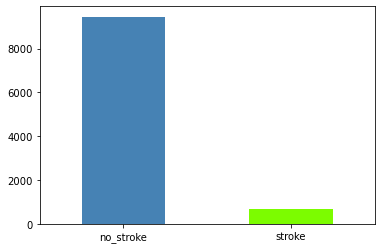

In [92]:
st_plot = df["stroke"].value_counts().plot(kind="bar",color=["steelblue","lawngreen"], rot=0)
plt.xticks(ticks=[1,0], labels=["stroke", "no_stroke"])

In [93]:
df.drop(df[df["gender"] == 2].index, inplace=True)

In [94]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,29.701435,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
10105,0,18.0,0,0,1,3,1,65.38,25.100000,1,0
10106,1,17.0,0,0,0,0,1,89.57,29.701435,2,0
10107,1,26.0,0,0,0,2,1,140.93,21.000000,2,0
10108,0,5.0,0,0,1,2,1,197.11,29.701435,0,0


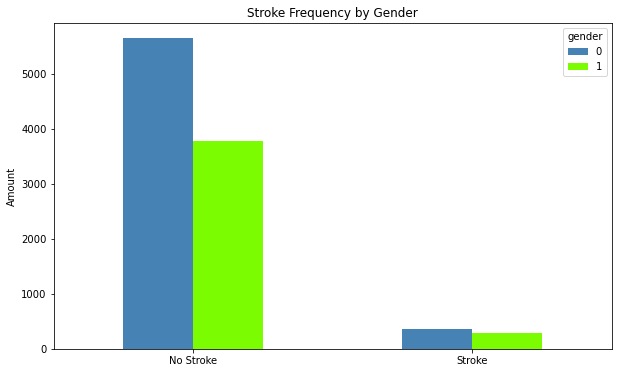

In [95]:
pd.crosstab(df.stroke, df.gender).plot(kind='bar',
                                       figsize=(10,6), 
                                       color=["steelblue","lawngreen"],
                                       rot=0)

# Styling
plt.title("Stroke Frequency by Gender")
plt.xticks(ticks=[0,1],labels=["No Stroke", "Stroke"])
plt.xlabel(None)
plt.ylabel("Amount");

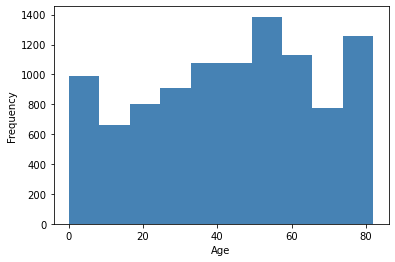

In [96]:
df["age"].plot.hist(color="steelblue")
plt.xlabel("Age");

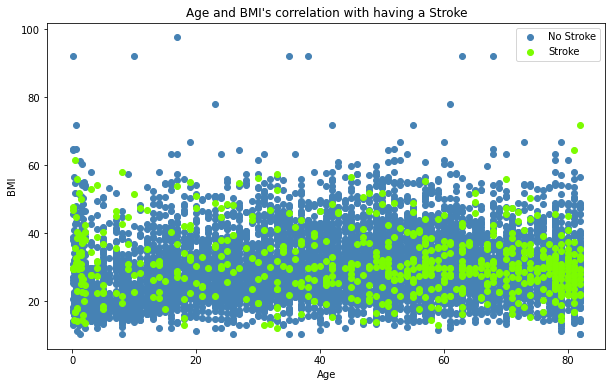

In [97]:
plt.figure(figsize=(10,6))

# Ages and BMI for people who haven't had a stroke
plt.scatter(df.age[df.stroke==0], 
            df.bmi[df.stroke==0],
            c="steelblue")

# Ages and BMI for people who have had a stroke
plt.scatter(df.age[df.stroke==1], 
            df.bmi[df.stroke==1],
            c="lawngreen")

# Styling
plt.title("Age and BMI's correlation with having a Stroke")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["No Stroke", "Stroke"]);

In [98]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

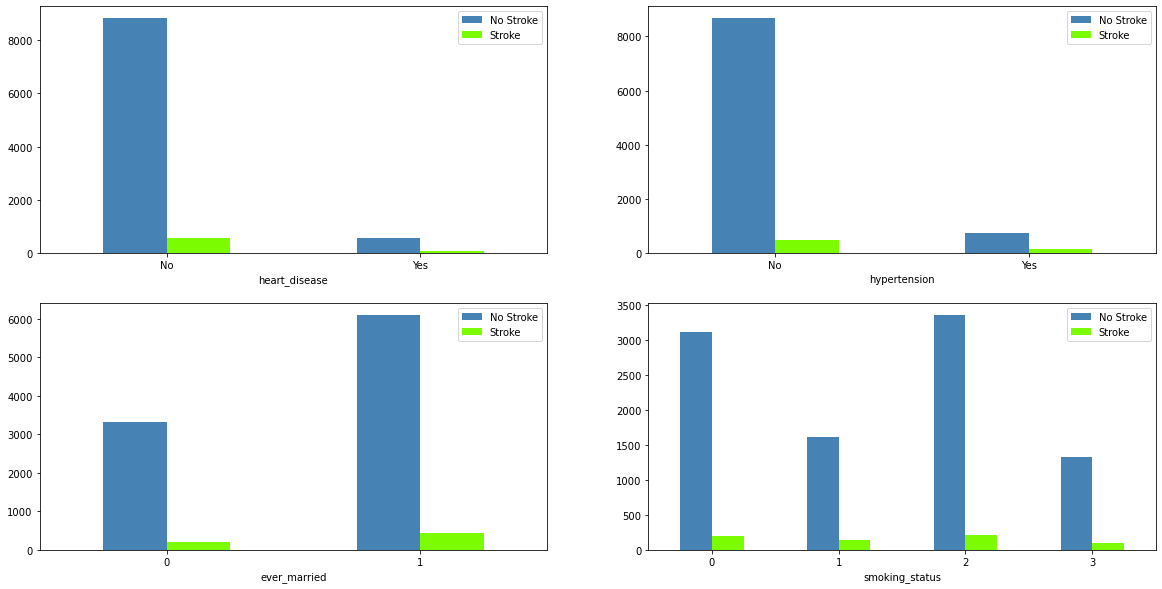

In [99]:
# Creating some crosstab info for some of the remaining columns 
ct1 = pd.crosstab(df.heart_disease,df.stroke)
ct2 = pd.crosstab(df.hypertension,df.stroke)
ct3 = pd.crosstab(df.ever_married,df.stroke)
ct4 = pd.crosstab(df.smoking_status,df.stroke)

# Setting the colors
colors = ["steelblue","lawngreen"]

# Setting up the figure and different axes on the figure
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2, 
                                          figsize=(20,10))

# Plotting each crosstab on a different axis
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ct2.plot(kind='bar',ax=ax2,color=colors,rot=0)
ct3.plot(kind='bar',ax=ax3,color=colors,rot=0)
ct4.plot(kind='bar',ax=ax4,color=colors,rot=0);

# Setting x labels for heart_disease and hypertension
ax1.set_xticklabels(["No","Yes"])
ax2.set_xticklabels(["No","Yes"])

# Changing the lables of the legend
ax1.legend(labels=['No Stroke', 'Stroke'])
ax2.legend(labels=['No Stroke', 'Stroke'])
ax3.legend(labels=['No Stroke', 'Stroke'])
ax4.legend(labels=['No Stroke', 'Stroke']);

In [100]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.016333,0.031799,0.066328,-0.048824,0.029075,-0.048282,0.026782,-0.013413,-0.060711,0.021834
age,-0.016333,1.000000,0.128734,0.104023,0.333424,-0.190467,0.004859,0.124028,0.142253,0.119729,0.066333
hypertension,0.031799,0.128734,1.000000,0.084169,0.078995,-0.007005,-0.019857,0.090810,0.085402,0.073958,0.127418
heart_disease,0.066328,0.104023,0.084169,1.000000,0.048679,-0.002247,0.005329,0.076027,0.031838,0.020478,0.066476
ever_married,-0.048824,0.333424,0.078995,0.048679,1.000000,-0.168935,0.016396,0.072004,0.143291,0.135010,0.016463
work_type,0.029075,-0.190467,-0.007005,-0.002247,-0.168935,1.000000,-0.000972,-0.032860,-0.128200,-0.141691,-0.001319
Residence_type,-0.048282,0.004859,-0.019857,0.005329,0.016396,-0.000972,1.000000,0.004501,-0.006495,0.009706,-0.000735
avg_glucose_level,0.026782,0.124028,0.090810,0.076027,0.072004,-0.032860,0.004501,1.000000,0.077425,0.016276,0.045709
bmi,-0.013413,0.142253,0.085402,0.031838,0.143291,-0.128200,-0.006495,0.077425,1.000000,0.100859,0.036785
smoking_status,-0.060711,0.119729,0.073958,0.020478,0.135010,-0.141691,0.009706,0.016276,0.100859,1.000000,0.006263


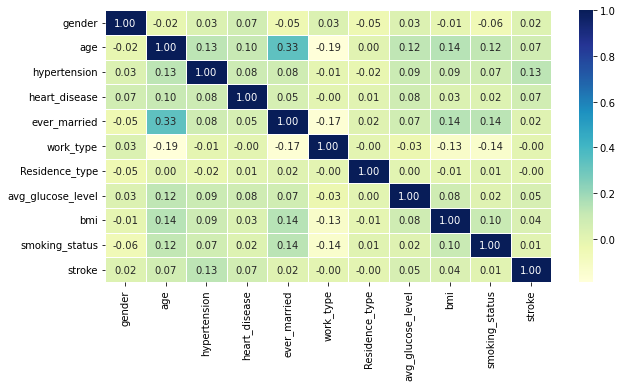

In [101]:
corr_matrix = df.corr() 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=0.5,
                 fmt=".2f", 
                 cmap="YlGnBu" 
                );